# Imagine how they sound

[![GitHub License](https://img.shields.io/github/license/Dragon1573/PyChallenge-Tips?color=important&label=Licence&style=flat-square)](https://github.com/Dragon1573/PyChallenge-Tips/blob/master/LICENSE)
[![Jump to Level 25](https://img.shields.io/badge/Jump%20to-Level%2025-blue?style=flat-square)](http://www.pythonchallenge.com/pc/hex/lake.html)

<center><img src="../../resources/imgs/Quiz25-1.png" /></center>

&emsp;&emsp;可以看出，这张图片是由$5\times5$块小拼图拼接而成的，而关卡标题提到了关键词`sound`，估计存在对应名称的音频文件。

&emsp;&emsp;日常先检查源代码。

In [1]:
from requests import get
from bs4 import BeautifulSoup as Soup

In [2]:
""" 获取关卡源代码 """
response = get(
    'http://www.pythonchallenge.com/pc/hex/lake.html',
    headers={'Authorization': 'Basic YnV0dGVyOmZseQ=='}
)
response = Soup(response.text, features='html5lib')
print(response.img)
print(response.img.next.next.strip())

<img src="lake1.jpg"/>
can you see the waves?


&emsp;&emsp;`lake1.jpg`、`waves`？难道换成`lake1.wav`？而且关卡图片有25块小拼图，莫非需要25段音频拼接起来？

In [3]:
from io import BytesIO
import wave

In [4]:
""" 获取25个音频文件 """
archives = []
for k in range(1, 26):
    response = get(
        'http://www.pythonchallenge.com/pc/hex/lake{0}.wav'.format(k),
        headers={'Authorization': 'Basic YnV0dGVyOmZseQ=='}
    )
    archives.append(wave.open(BytesIO(response.content), mode='rb'))

In [5]:
""" 获取音频帧数 """
for audio in archives:
    print('Frames: %d' % audio.getnframes(), end='\t')

Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	Frames: 10800	

&emsp;&emsp;我们看到，每一个音频都有10.8kFrames，而每一个`RGB`像素需要3Frames，这样每个音频就能构成3600个像素，即一块$60\times60$的小拼图。将25个音频按$5\times5$拼接成1张$300 \times 300$的大图，就能获得答案。

In [6]:
from PIL import Image

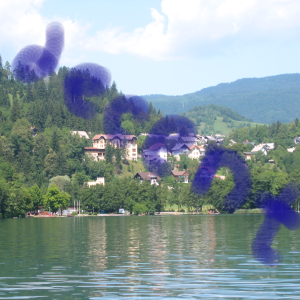

In [7]:
""" 音频转图像，合成拼图 """
result = Image.new('RGB', (300, 300))
for k in range(25):
    data = archives[k].readframes(archives[k].getnframes())
    image = Image.frombytes('RGB', (60, 60), data)
    result.paste(image, (60 * (k % 5), 60 * (k // 5)))
display(result)

&emsp;&emsp;所以下一关的链接为<http://www.pythonchallenge.com/pc/hex/decent.html>。